In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from numpy import concatenate
from pandas import *
from sklearn.preprocessing import *
from sklearn.metrics import *
from tensorflow import keras
import tensorflow as tf
import time as t

In [2]:
w=16

In [3]:
dataFromSensors=np.load("DataWithLabels/dataFromSensors_"+str(w)+".npy")

In [4]:
np.info(dataFromSensors)

class:  ndarray
shape:  (475321, 16, 16)
strides:  (2048, 128, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x21c02d61040
byteorder:  little
byteswap:  False
type: float64


In [5]:
labels=np.load("DataWithLabels/labels_"+str(w)+".npy")

In [6]:
np.info(labels)

class:  ndarray
shape:  (475321,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x21c3cdcb040
byteorder:  little
byteswap:  False
type: float64


In [7]:
#values = reframed_df.values
#training_sample =int( len(dataset) *0.8)
training_sample_labels =int( len(labels) *0.8)
training_sample =int( len(dataFromSensors) *0.8)
#testDataset=DataFrame.to_numpy(dataset)
#testDataset=DataFrame.to_numpy(reframed_df)

In [8]:
training_sample_labels

380256

In [9]:
training_sample

380256

In [10]:
train_labels = labels[:training_sample]
train = dataFromSensors[:training_sample, : ,:]
test_labels = labels[training_sample:]
test = dataFromSensors[training_sample:, : , :]
# split into input and outputs
#train_X, train_y = train[:,:, 1:], train[:,:,0]
#test_X, test_y = test[:,:, 1:], test[:,:,0]
train_X, train_y = train[:,:, 1:], train_labels[:]
test_X, test_y = test[:,:, 1:], test_labels[:]

In [11]:
train_X.shape

(380256, 16, 15)

In [12]:
train_y

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
#print(train_X)

In [14]:
train_y.shape

(380256,)

In [15]:
#print(test_y)

In [16]:
train_y=train_y.reshape(train_y.shape[0],1)

In [17]:
test_y=test_y.reshape(test_y.shape[0],1)

In [18]:
#print(train_X)

In [19]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(380256, 16, 15) (380256, 1) (95065, 16, 15) (95065, 1)


In [20]:
model_gru =  keras.models.Sequential([
    keras.layers.GRU(128,return_sequences=True,input_shape=(train_X.shape[1],train_X.shape[2])),#,activation='relu'),
    keras.layers.GRU(units=64,return_sequences=True),#,activation='relu'),
    keras.layers.GRU(units=32),#,activation='relu'),
    keras.layers.Dense(units=50,activation='sigmoid'),
    keras.layers.Dense(units=1,activation='sigmoid')
                        ])
model_gru.compile(loss='MeanSquaredError', optimizer='sgd',metrics=['accuracy'])

In [21]:
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 16, 128)           55680     
                                                                 
 gru_1 (GRU)                 (None, 16, 64)            37248     
                                                                 
 gru_2 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 50)                1650      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 104,037
Trainable params: 104,037
Non-trainable params: 0
_________________________________________________________________


In [22]:
 start = t.time()

In [23]:
# fit network
gru_history = model_gru.fit(train_X, train_y, epochs=400,validation_data=(test_X, test_y), batch_size=128)#, shuffle=False)

Epoch 1/400
2971/2971 [==============================] - 54s 16ms/step - loss: 0.1924 - accuracy: 0.7393 - val_loss: 0.1856 - val_accuracy: 0.7531
Epoch 2/400
2971/2971 [==============================] - 46s 15ms/step - loss: 0.1918 - accuracy: 0.7393 - val_loss: 0.1850 - val_accuracy: 0.7531
Epoch 3/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1908 - accuracy: 0.7393 - val_loss: 0.1838 - val_accuracy: 0.7531
Epoch 4/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1883 - accuracy: 0.7393 - val_loss: 0.1803 - val_accuracy: 0.7531
Epoch 5/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1827 - accuracy: 0.7394 - val_loss: 0.1741 - val_accuracy: 0.7531
Epoch 6/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1769 - accuracy: 0.7416 - val_loss: 0.1695 - val_accuracy: 0.7538
Epoch 7/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1728 - accuracy: 0.7414 - val_loss: 0

2971/2971 [==============================] - 46s 16ms/step - loss: 0.1551 - accuracy: 0.7584 - val_loss: 0.1529 - val_accuracy: 0.7612
Epoch 57/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1550 - accuracy: 0.7585 - val_loss: 0.1531 - val_accuracy: 0.7607
Epoch 58/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1549 - accuracy: 0.7587 - val_loss: 0.1521 - val_accuracy: 0.7631
Epoch 59/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1548 - accuracy: 0.7588 - val_loss: 0.1520 - val_accuracy: 0.7639
Epoch 60/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1547 - accuracy: 0.7590 - val_loss: 0.1513 - val_accuracy: 0.7638
Epoch 61/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1546 - accuracy: 0.7592 - val_loss: 0.1513 - val_accuracy: 0.7639
Epoch 62/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1545 - accuracy: 0.7597 - val_loss: 0.1518 

2971/2971 [==============================] - 47s 16ms/step - loss: 0.1499 - accuracy: 0.7700 - val_loss: 0.1472 - val_accuracy: 0.7743
Epoch 112/400
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1498 - accuracy: 0.7700 - val_loss: 0.1476 - val_accuracy: 0.7742
Epoch 113/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1497 - accuracy: 0.7702 - val_loss: 0.1491 - val_accuracy: 0.7731
Epoch 114/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1496 - accuracy: 0.7699 - val_loss: 0.1473 - val_accuracy: 0.7735
Epoch 115/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1496 - accuracy: 0.7704 - val_loss: 0.1473 - val_accuracy: 0.7735
Epoch 116/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1495 - accuracy: 0.7705 - val_loss: 0.1477 - val_accuracy: 0.7739
Epoch 117/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1495 - accuracy: 0.7704 - val_loss: 0

2971/2971 [==============================] - 46s 16ms/step - loss: 0.1472 - accuracy: 0.7749 - val_loss: 0.1468 - val_accuracy: 0.7774
Epoch 167/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1472 - accuracy: 0.7749 - val_loss: 0.1460 - val_accuracy: 0.7765
Epoch 168/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1471 - accuracy: 0.7752 - val_loss: 0.1454 - val_accuracy: 0.7768
Epoch 169/400
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1471 - accuracy: 0.7753 - val_loss: 0.1452 - val_accuracy: 0.7783
Epoch 170/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1471 - accuracy: 0.7753 - val_loss: 0.1469 - val_accuracy: 0.7757
Epoch 171/400
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1470 - accuracy: 0.7754 - val_loss: 0.1456 - val_accuracy: 0.7784
Epoch 172/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1469 - accuracy: 0.7754 - val_loss: 0

2971/2971 [==============================] - 46s 16ms/step - loss: 0.1448 - accuracy: 0.7792 - val_loss: 0.1442 - val_accuracy: 0.7807
Epoch 222/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1448 - accuracy: 0.7793 - val_loss: 0.1439 - val_accuracy: 0.7804
Epoch 223/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1447 - accuracy: 0.7794 - val_loss: 0.1435 - val_accuracy: 0.7810
Epoch 224/400
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1447 - accuracy: 0.7796 - val_loss: 0.1439 - val_accuracy: 0.7811
Epoch 225/400
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1447 - accuracy: 0.7792 - val_loss: 0.1434 - val_accuracy: 0.7808
Epoch 226/400
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1446 - accuracy: 0.7796 - val_loss: 0.1441 - val_accuracy: 0.7797
Epoch 227/400
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1446 - accuracy: 0.7795 - val_loss: 0

2971/2971 [==============================] - 46s 16ms/step - loss: 0.1432 - accuracy: 0.7817 - val_loss: 0.1429 - val_accuracy: 0.7816
Epoch 277/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1432 - accuracy: 0.7814 - val_loss: 0.1434 - val_accuracy: 0.7826
Epoch 278/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1432 - accuracy: 0.7816 - val_loss: 0.1434 - val_accuracy: 0.7822
Epoch 279/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1432 - accuracy: 0.7813 - val_loss: 0.1429 - val_accuracy: 0.7829
Epoch 280/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1431 - accuracy: 0.7817 - val_loss: 0.1431 - val_accuracy: 0.7820
Epoch 281/400
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1431 - accuracy: 0.7816 - val_loss: 0.1432 - val_accuracy: 0.7813
Epoch 282/400
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1431 - accuracy: 0.7815 - val_loss: 0

2971/2971 [==============================] - 47s 16ms/step - loss: 0.1421 - accuracy: 0.7831 - val_loss: 0.1422 - val_accuracy: 0.7844
Epoch 332/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1420 - accuracy: 0.7835 - val_loss: 0.1425 - val_accuracy: 0.7838
Epoch 333/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1420 - accuracy: 0.7836 - val_loss: 0.1421 - val_accuracy: 0.7841
Epoch 334/400
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1420 - accuracy: 0.7833 - val_loss: 0.1421 - val_accuracy: 0.7843
Epoch 335/400
2971/2971 [==============================] - 47s 16ms/step - loss: 0.1420 - accuracy: 0.7832 - val_loss: 0.1431 - val_accuracy: 0.7812
Epoch 336/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1420 - accuracy: 0.7836 - val_loss: 0.1435 - val_accuracy: 0.7846
Epoch 337/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1419 - accuracy: 0.7835 - val_loss: 0

2971/2971 [==============================] - 79s 27ms/step - loss: 0.1411 - accuracy: 0.7846 - val_loss: 0.1416 - val_accuracy: 0.7850
Epoch 387/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1411 - accuracy: 0.7845 - val_loss: 0.1420 - val_accuracy: 0.7843
Epoch 388/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1411 - accuracy: 0.7846 - val_loss: 0.1418 - val_accuracy: 0.7846
Epoch 389/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1411 - accuracy: 0.7851 - val_loss: 0.1413 - val_accuracy: 0.7850
Epoch 390/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1411 - accuracy: 0.7846 - val_loss: 0.1416 - val_accuracy: 0.7840
Epoch 391/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1411 - accuracy: 0.7849 - val_loss: 0.1418 - val_accuracy: 0.7849
Epoch 392/400
2971/2971 [==============================] - 46s 16ms/step - loss: 0.1410 - accuracy: 0.7851 - val_loss: 0

In [24]:
pred_y =  model_gru.predict(test_X)

2971/2971 [==============================] - 16s 5ms/step


In [25]:
stop=t.time()-start
print(stop)

18634.032807588577


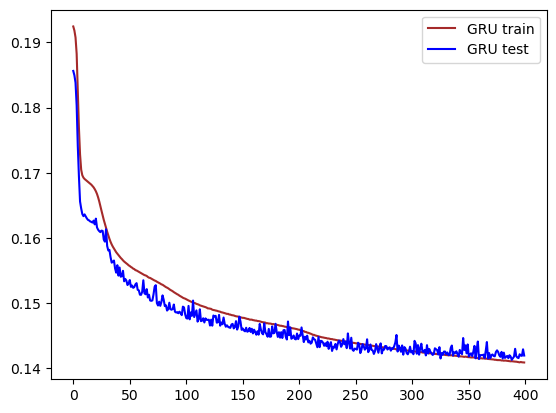

In [26]:
plt.plot(gru_history.history['loss'], label='GRU train', color='brown')
plt.plot(gru_history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [27]:
print(test_y)

[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [28]:
np.shape(pred_y)

(95065, 1)

In [29]:
pred_y

array([[0.00148319],
       [0.00122918],
       [0.00062769],
       ...,
       [0.05062618],
       [0.05188569],
       [0.05331772]], dtype=float32)

In [30]:
pred_y=np.reshape(pred_y,95065)

0.14197936293073268
0.23652269572704498
0.37680149008560554
0.28298595070201776


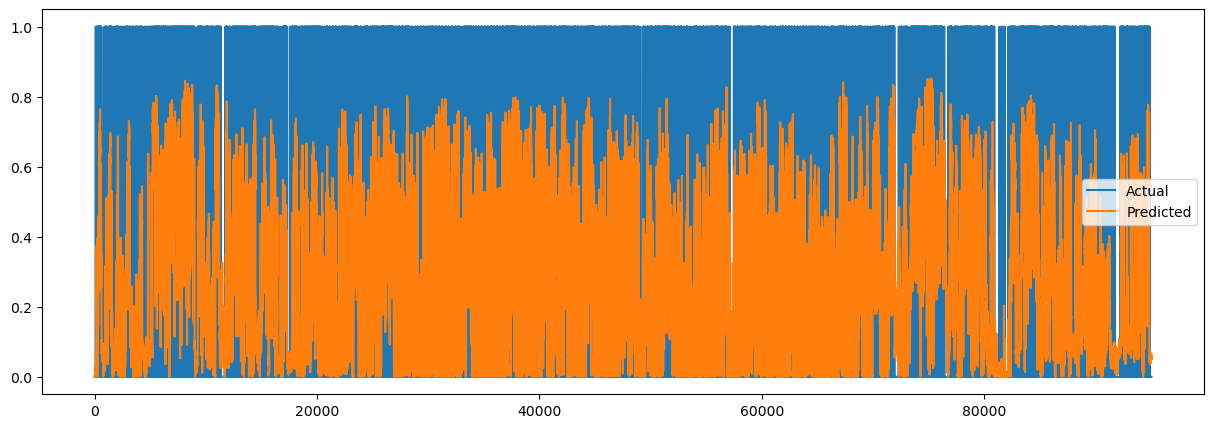

In [31]:

plt.rcParams['figure.figsize'] = (15,5)

MSE = mean_squared_error(test_y, pred_y)
R2 = r2_score(test_y, pred_y)
RMSE = sqrt(mean_squared_error(test_y, pred_y))
MAE = mean_absolute_error(test_y, pred_y)


print(MSE)
print(R2)
print(RMSE)
print(MAE)


plt.plot(test_y, label = 'Actual')
plt.plot(pred_y, label = 'Predicted')
plt.legend()
plt.show()

In [32]:
np.shape(train_X)

(380256, 16, 15)

In [33]:
np.shape(train_y)

(380256, 1)

In [34]:
np.shape(test_X)

(95065, 16, 15)

In [35]:
np.shape(test_y)

(95065, 1)

14854/14854 [==============================] - 74s 5ms/step


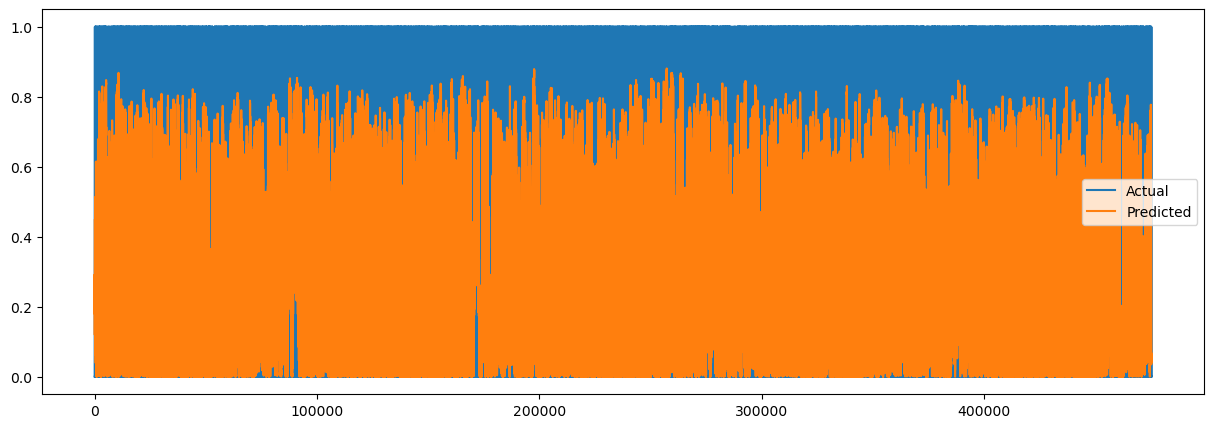

In [36]:
tra = np.concatenate([train_X,test_X])
tes = np.concatenate([train_y,test_y])
fp = model_gru.predict(tra)
plt.plot(tes, label = 'Actual')
plt.plot(fp, label = 'Predicted')
plt.legend()
plt.show()

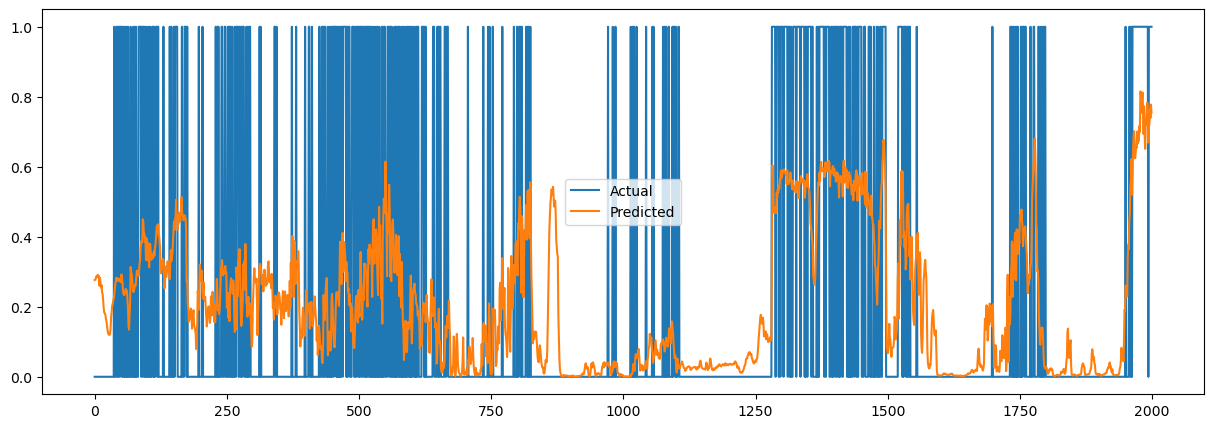

In [37]:
plt.plot(tes[:2000], label = 'Actual')
plt.plot(fp[:2000], label = 'Predicted')
plt.legend()
plt.show()

In [38]:
print(sum(tes)/len(tes))

[0.25794568]


In [39]:
#print(fp[1000:1010])
_fp = np.where(fp>0.5,1,0)
_all = sum(_fp)
_w = (_fp*tes)
print(sum(_w)/_all)
      
_all_z = sum(1-_fp)      
_w_z = (1-_fp)*(1-tes)
print(sum(_w_z)/_all_z)
print('total acc', (sum(_w)+sum(_w_z))/len(_w))

[0.60642004]
[0.83076387]
total acc [0.78524197]


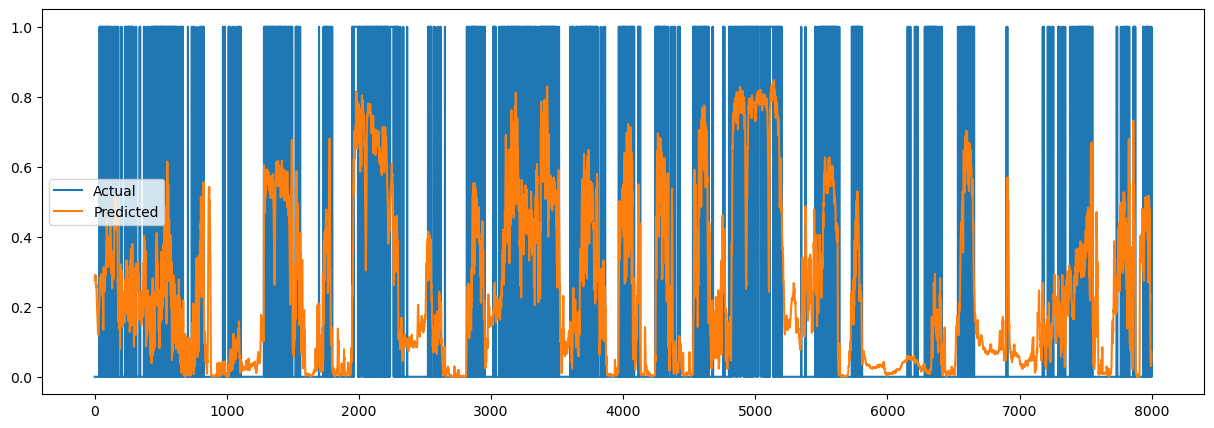

In [40]:
plt.plot(tes[:8000], label = 'Actual')
plt.plot(fp[:8000], label = 'Predicted')
plt.legend()
plt.show()

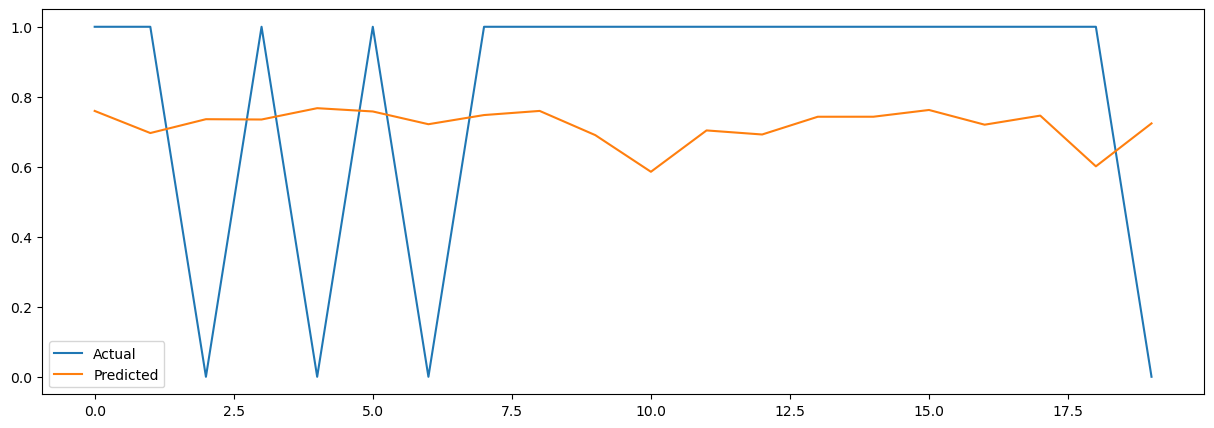

In [41]:
#over very small part of data
plt.plot(tes[2000:2020], label = 'Actual')
plt.plot(fp[2000:2020], label = 'Predicted')
plt.legend()
plt.show()

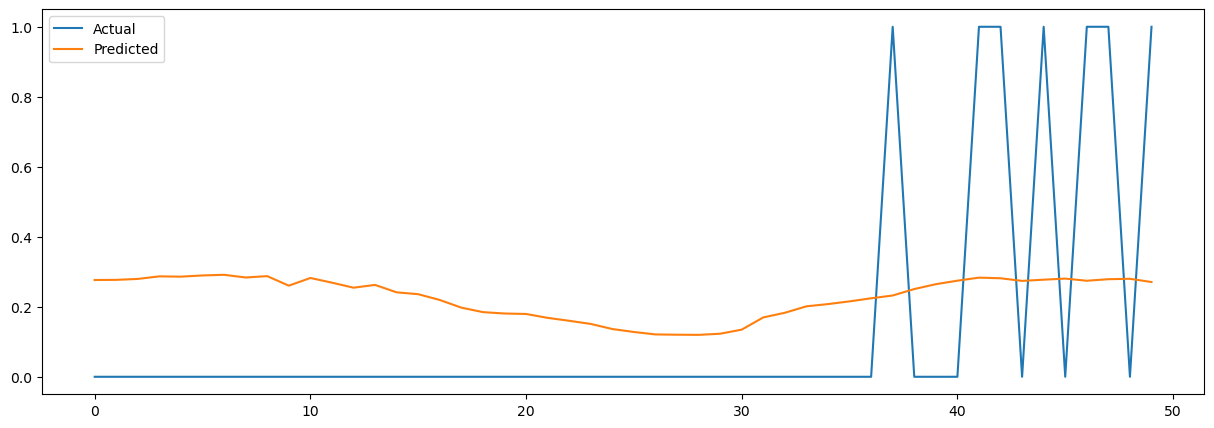

In [42]:
plt.plot(tes[:50], label = 'Actual')
plt.plot(fp[:50], label = 'Predicted')
plt.legend()
plt.show()

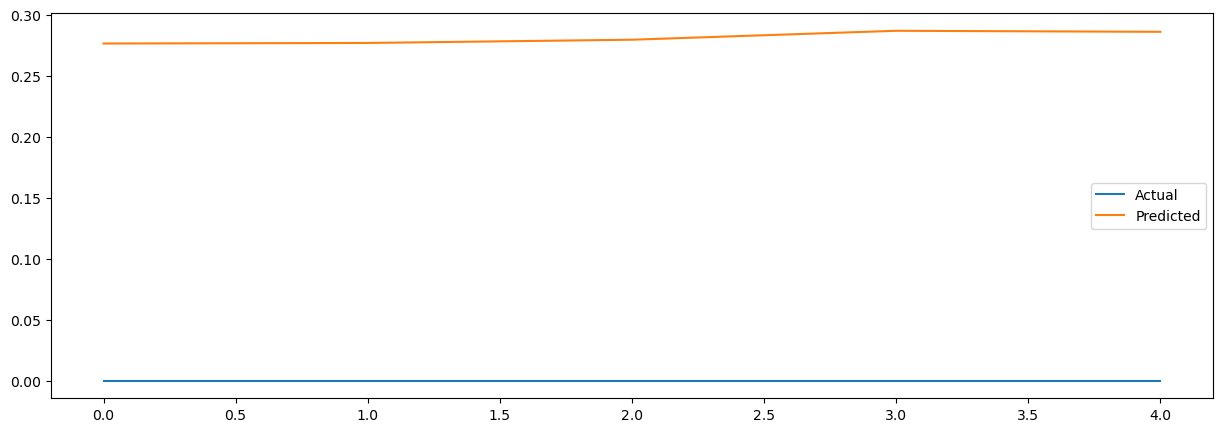

In [43]:
plt.plot(tes[:5], label = 'Actual')
plt.plot(fp[:5], label = 'Predicted')
plt.legend()
plt.show()